<a href="https://colab.research.google.com/github/Git-Hub-Pro/Kalmanfilter/blob/master/low_pass_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/') # '/content/gdrive/My Drive/data/kalmanfilter/source/2.MovAvgFilter/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [0]:
input_mat = io.loadmat('/content/gdrive/My Drive/data/kalmanfilter/source/3.LPF/SonarAlt.mat')

In [0]:
def get_sonar(i):
    z = input_mat['sonarAlt'][0][i] 
    return z

In [0]:
def low_pass_filter(x_meas,x_esti):
    x_esti = alpha * x_esti + (1-alpha)*x_meas
    return x_esti

In [0]:
alpha = 0.7 
# alpha의 작으면 1-alpha 값이 상대적으로 더 커집니다. 결국 추정값 계산에 측정값이 더 많이 반영이 되어집니다. 이렇게 되면 저주파 통과 필터는 잡음 제거보다는 측정값의
# 변화에 더 민감해집니다 그래서 alpha가 작을 때 추정값에 잡음이 더 많이 나타납니다.
n_samples = 500
time_end = 10

In [0]:
dt = time_end / n_samples
time = np.arange(0,time_end,dt)
x_meas_save = np.zeros(n_samples)
x_esti_save = np.zeros(n_samples)

In [0]:
x_esti  = None
for i in range(n_samples):
    x_meas = get_sonar(i)
    if i == 0:
        x_esti = x_meas
    else:
        x_esti = low_pass_filter(x_meas,x_esti)

    x_meas_save[i] = x_meas
    x_esti_save[i] = x_esti

Text(0, 0.5, 'Altitude [m]')

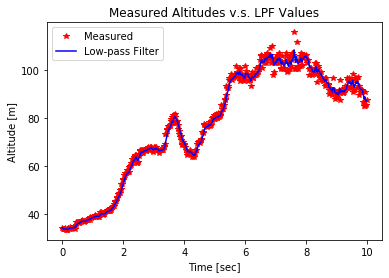

In [13]:
plt.plot(time,x_meas_save,'r*',label='Measured')
plt.plot(time,x_esti_save,'b-',label='Low-pass Filter')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. LPF Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')